# belosgraficos instagram.com/belosgraficos/

#### Notebook para a criação do gráfico do tipo cordilheira com a temperatura diária de Porto Alegre no ano de 2020

### Comentários estão em português - Comments are in Portuguese

## Notebook criado utilizando o Kaggle

Importando as bibliotecas necessarias para a execução do código

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Lendo o arquivos dados

In [4]:
# Lendo o arquivo CSV - Atenção para o caminho do arquivo
file_path = '../input/temperatura-diria-de-porto-alegre-ano-de-2020/temperatura_poa.csv'
dataset = pd.read_csv(file_path, 
                      sep = ";")
dataset.head()

,Data,MAX,MED,MIN
0,01/01/2020,34.5,27.24,24.3
1,02/01/2020,27.8,23.78,21.2
2,03/01/2020,27.9,22.94,19.5
3,04/01/2020,29.1,23.75,20.5
4,05/01/2020,33.1,25.35,19.5


Preparando os dados para a criação do gráfico

In [7]:
# Adicionando uma nova coluna 'Mes' contendo apenas o mês de cada data
dataset['Mes'] = pd.to_datetime(dataset['Data'], format='%d/%m/%Y').dt.month

# Criando um dicionário para traduzir cada número do mês em seu nome
month_dict = {1: 'Janeiro',
              2: 'Fevereiro',
              3: 'Março',
              4: 'Abril',
              5: 'Maio',
              6: 'Junho',
              7: 'Julho',
              8: 'Agosto',
              9: 'Setembro',
              10: 'Outubro',
              11: 'Novembro',
              12: 'Dezembro'}

# Atualizando nomes no dataset
dataset['Mes'] = dataset['Mes'].map(month_dict)

# Calculando a temperatura média de cada mês para a criação da paletta de cores 
media_mensal = dataset.groupby('Mes')['MED'].mean()

# Adicionando uma nova coluna 'media_mes' contendo a média de temperatura de cada mês
dataset['media_mes'] = dataset['Mes'].map(media_mensal)

# Verificando
dataset.head()

,Data,MAX,MED,MIN,Mes,media_mes
0,01/01/2020,34.5,27.24,24.3,Janeiro,25.313871
1,02/01/2020,27.8,23.78,21.2,Janeiro,25.313871
2,03/01/2020,27.9,22.94,19.5,Janeiro,25.313871
3,04/01/2020,29.1,23.75,20.5,Janeiro,25.313871
4,05/01/2020,33.1,25.35,19.5,Janeiro,25.313871


#### Criando o gráfico

<Figure size 1080x1080 with 0 Axes>

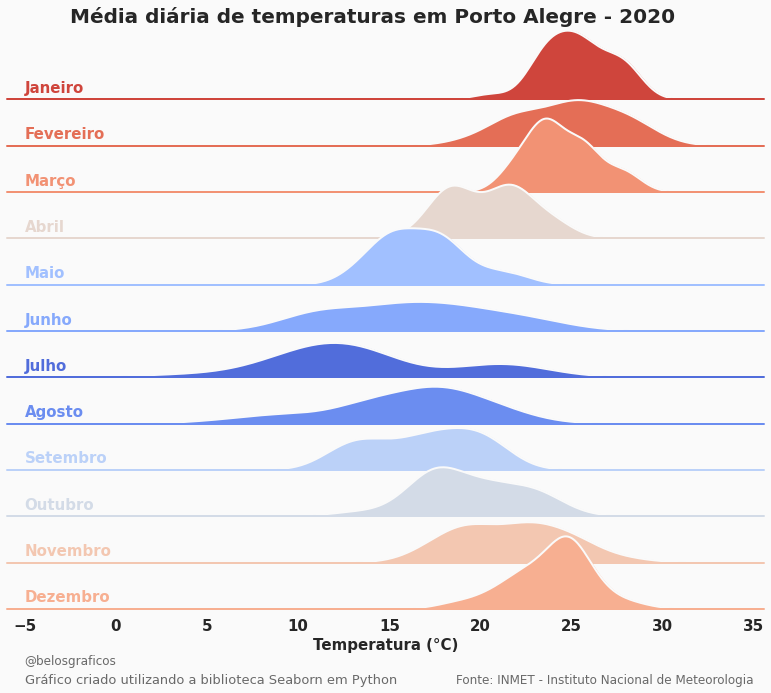

In [10]:
# Criando uma figura, com tamanho 15x15
plt.figure(figsize=(15, 15))

# Definindo tema do gráfico e cores de fundo
sns.set_theme(style="white", 
              rc={"axes.facecolor": (0, 0, 0, 0), # Cor de fundo dos eixos
                  'figure.facecolor':'#fafafa'})  # Cor de fundo da figura

# Criando um FacetGrid com uma linha para cada mês
# A média da temperatura mensal definirá a cor de cada um dos gráficos
g = sns.FacetGrid(dataset, 
                  row='Mes', 
                  hue='media_mes', 
                  aspect=15, 
                  height=0.75, 
                  palette='coolwarm')

# KDEplot de densidade para cada um dos meses
g.map(sns.kdeplot, 
      'MED',
      fill=True, 
      alpha=1, 
      linewidth=1.5)

# Linha branca contornando os KDEplots, apenas para efeito visual
g.map(sns.kdeplot, 
      'MED', 
      bw_adjust=1, 
      clip_on=False, 
      color="#fafafa", lw=2) # Usar a mesma cor do fundo da figura

# Linha horizontal em cada um dos plots, apenas para efeito visual
g.map(plt.axhline, 
      y=0,
      lw=2, 
      clip_on=False)

# Loopando sobre o FacetGrid para adicionar o nome do mês com a mesma cor do gráfico
# O comando ax.lines[-1].get_color() permite acessar a cor da linha
for i, ax in enumerate(g.axes.flat):
    ax.text(-5, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# Ajustando a altura dos gráficos para eles terem uma leve sobreposição
g.fig.subplots_adjust(hspace=-0.4)

# Removendo titulos dos eixos, ticks e spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Adicionando label no eixo X - Temperatura
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperatura (°C)', fontweight='bold', fontsize=15)

# Adicionando título à figura
g.fig.suptitle('Média diária de temperaturas em Porto Alegre - 2020',
               ha='center',
               fontsize=20,
               weight='semibold')

# Adicionando notas de rodapé com a fonte dos dados e mais informações - utiliza as coordenadas
plt.text(35, -0.2, "Fonte: INMET - Instituto Nacional de Meteorologia", 
         horizontalalignment='right',
         va = 'baseline',
         size=12, color='dimgray')

plt.text(-5, -0.2, "Gráfico criado utilizando a biblioteca Seaborn em Python", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-5, -0.15, "@belosgraficos", 
         horizontalalignment='left',
         va = 'baseline',
         size=12, color='dimgray')

# Salva a figura e exibe o gráfico no console
plt.savefig("ridgeplot.png")
plt.show()